In [1]:
"""
Construct a real HDF5 file from the real dataset (RT-1-X)
"""

#load the dataset
import os
os.environ['CURL_CA_BUNDLE'] = '/etc/ssl/certs/ca-bundle.crt'
import tensorflow as tf 
import tensorflow_datasets as tfds
import tqdm
import h5py
import numpy as np
# load raw dataset --> replace this with tfds.load(<dataset_name>) on your
# local machine!
# dataset_name = 'bc_z'
dataset_name_list = ['fractal20220817_data',
'bridge:1.0.0',
'taco_play',
'jaco_play',
'roboturk',
'viola',
'berkeley_autolab_ur5',
'language_table',
'stanford_hydra_dataset_converted_externally_to_rlds',
'maniskill_dataset_converted_externally_to_rlds',
'ucsd_kitchen_dataset_converted_externally_to_rlds',
'ucsd_pick_and_place_dataset_converted_externally_to_rlds',
'bc_z',
'berkeley_rpt_converted_externally_to_rlds',
'kaist_nonprehensile_converted_externally_to_rlds',
'stanford_mask_vit_converted_externally_to_rlds',
'asu_table_top_converted_externally_to_rlds',
'stanford_robocook_converted_externally_to_rlds',
'iamlab_cmu_pickup_insert_converted_externally_to_rlds',
'berkeley_fanuc_manipulation',
'cmu_food_manipulation',
'cmu_play_fusion',
'berkeley_gnm_recon']


data_dir= '/data/home/acw694/CLIPort_new_loss/scratch/tensorflow_datasets'

# Take just take the first and the last step
def episode2steps(episode):
    return episode['steps']

def filter_first_last_terminal(step):
    return step['is_first'] | step['is_terminal']

def append_or_create_dataset(f, name, data, dtype=None):

    if name in f:
        # If dataset already exists, append to it
        dset = f[name]
        dset.resize(dset.shape[0] + len(data), axis=0)
        dset[-len(data):] = data
        n = len(dset)

    else:
        if dtype is None:
            maxshape = (None,) + data[0].shape
            chunks = (1,) + data[0].shape
            f.create_dataset(name, data=data, maxshape=maxshape,
                                chunks=chunks)
        else:
            maxshape = (None,)
            chunks = (1,)  # For variable-length data
            f.create_dataset(name, data=data, maxshape=maxshape,
                                chunks=chunks, dtype=dtype)

        n = len(data)

    return n

2025-02-05 15:08:22.430156: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 15:08:23.175760: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-05 15:08:24.476661: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-05 15:08:24.476748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-05 15:08:24.623980: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [101]:
import matplotlib.pyplot as plt
import tensorflow as tf

dataset_name =  dataset_name_list[1]

# load the dataset
ds, ds_info = tfds.load(
    dataset_name, data_dir = data_dir, download=False, split='train', with_info=True)

print(ds_info)

def step_map_fn(step):
    return {
        'observation': {
            'image_0': step['observation']['image_0'],
            'image_1': step['observation']['image_1'],
            'image_2': step['observation']['image_2'],
            'image_3': step['observation']['image_3'],
            'language': step['language_instruction'],
        }   
    }

tfds.core.DatasetInfo(
    name='bridge_dataset',
    full_name='bridge_dataset/1.0.0',
    description="""
    TODO(example_dataset): Markdown description of your dataset.
    Description is **formatted** as markdown.
    
    It should also contain any processing which has been applied (if any),
    (e.g. corrupted example skipped, images cropped,...):
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/bridge_dataset',
    data_dir='/data/home/acw694/CLIPort_new_loss/scratch/tensorflow_datasets/bridge/1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=123.39 GiB,
    features=FeaturesDict({
        'episode_metadata': FeaturesDict({
            'episode_id': Scalar(shape=(), dtype=int32),
            'file_path': Text(shape=(), dtype=string),
            'has_image_0': Scalar(shape=(), dtype=bool),
            'has_image_1': Scalar(shape=(), dtype=bool),
            'has_image_2': Scalar(shape=(), dtype=bool),
            'has_image_3':

In [107]:
print(f"Loading dataset: {dataset_name}")
data_s1 = []
data_s2 = []
data_language = []

# first map to steps
ds_steps = ds.map(
    episode2steps, num_parallel_calls=tf.data.AUTOTUNE).flat_map(lambda x: x)

# then filtered out the first and the last image
filtered_ds = ds_steps.filter(filter_first_last_terminal)

# obtain the image in each step
ds_mapped = filtered_ds.map(step_map_fn, num_parallel_calls=tf.data.AUTOTUNE)
batch_itor = ds_mapped.batch(2).as_numpy_iterator()


Loading dataset: bridge:1.0.0


b'put small spoon from basket to tray'
b'put small spoon from basket to tray'


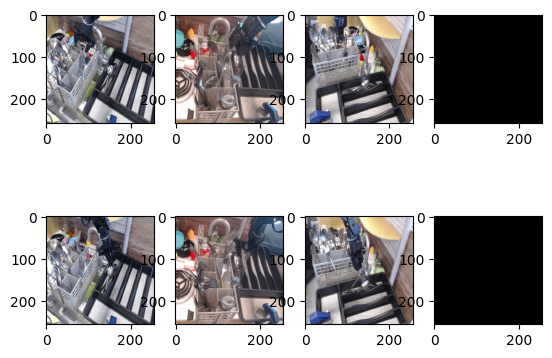

In [108]:
batch = next(batch_itor)
# Collect images and language data
image_start_0 = batch['observation']['image_0'][0]
image_start_1 = batch['observation']['image_1'][0]
image_start_2 = batch['observation']['image_2'][0]
image_start_3 = batch['observation']['image_3'][0]

image_end_0 = batch['observation']['image_0'][1]
image_end_1 = batch['observation']['image_1'][1]
image_end_2 = batch['observation']['image_2'][1]
image_end_3 = batch['observation']['image_3'][1]


plt.subplot(2, 4, 1)
plt.imshow(image_start_0)
plt.subplot(2, 4, 2)
plt.imshow(image_start_1)
plt.subplot(2, 4, 3)
plt.imshow(image_start_2)
plt.subplot(2, 4, 4)
plt.imshow(image_start_3)
plt.subplot(2, 4, 5)
plt.imshow(image_end_0)
plt.subplot(2, 4, 6)
plt.imshow(image_end_1)
plt.subplot(2, 4, 7)
plt.imshow(image_end_2)
plt.subplot(2, 4, 8)
plt.imshow(image_end_3)

language_start = batch['observation']['language'][0]
language_end = batch['observation']['language'][1]

print(language_start)
print(language_end)

#assert image_start.shape == image_end.shape
#assert language_start == language_end, "Language should be the same for the first and last step"

In [98]:
len(batch['observation']['image_0'])

2

In [109]:
image_end_3

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)